# Gauss Data How To
MI udtryk:
\begin{align}
    I(X;Y)=\dfrac{d}{2}\log_2\left( 1 + \dfrac{\sigma_x^2}{\sigma_y^2} \right).
\end{align}

Fra Dave Moore's [hjemmeside](http://davmre.github.io/blog/statistics/2015/03/27/gaussian_quotient):

Lad
\begin{align}
    X&\sim\mathcal{N}\left(x;\ a,\ A \right) \\
    Y&\sim\mathcal{N}\left(y;\ b,\ B \right)
\end{align}
så er kvoetienten udtrykt ved:
\begin{align}
    \dfrac{\mathcal{N}\left(x;\ a,\ A \right)}{\mathcal{N}\left(y;\ b,\ B \right)} = \beta \mathcal{N}\left(z;\ d,\ D \right)
\end{align}
hvor 
\begin{align}
    D&=(A^{-1}-B^{-1})^{-1} \\
    d&=D(A^{-1}a-B^{-1}b) \\
    \beta&=\dfrac{|B|}{|B-A|}\left( \mathcal{N}\left( a;\ b,\ B-A \right) \right)^{-1}
\end{align}

skulle man jo have troet, men Dave Moore er fuld af lort
```
N = int(10e5)

a, A = 100, 5
b, B = 100, 100

D = 1/(A**-1 - B**-1)
d = D*(A**-1 * a - B**-1 * b)
beta = (B / (B-A)) / norm.pdf(a, loc=b, scale=np.sqrt(B-A))

x = np.linspace(80, 120, 1000)
y_pdf = beta * norm.pdf(x, loc=b, scale=np.sqrt(D))
test_pdf = np.random.normal(a, np.sqrt(A), N) / np.random.normal(b, np.sqrt(B), N)

plt.hist(test_pdf, bins=50, alpha=0.8, label="Numerical Test", density=True)
# plt.plot(x, y_pdf, label="Theoretical", alpha=0.8, ls="--")

plt.legend()
plt.show()
```
Ovenstående viser at deres udledninger er forkerte

Blev fucking træt af Jose, så jeg udledte et udtryk for densiteten for $\frac{Y}{X}$ og kom frem til at det ser sådan her ud:
\begin{align}
    Z = \dfrac{Y}{X} \sim \det\left( \Sigma_Y^{-1}\Sigma_X \right)^{1/2} \exp\left( \frac{1}{2}\left( (x-\mu_x)^\top\Sigma_X(x-\mu_x) - (y-\mu_y)^\top\Sigma_Y(y-\mu_y)\right) \right)
\end{align}

In [ ]:
import numpy as np
# Plot setup
import matplotlib.pyplot as plt

In [122]:
N = int(10e4)

mx = 8 * np.ones(2)
cx = np.identity(2)

my = 4 * np.ones(2)
cy = 2 * np.identity(2)

X = np.random.multivariate_normal(mean=mx, cov=cx, size=N)
Y = np.random.multivariate_normal(mean=my, cov=cy, size=N)

quot = Y/X
qx = quot[:, 0]
qy = quot[:, 1]

In [119]:
def fun(xy, mx=mx, my=my, cx=cx, cy=cy):
    first = np.sqrt(np.linalg.det(np.linalg.inv(cy) @ cx))
    a = np.array(0.5 * ( (xy - mx).T @ cx @ (xy - mx)  - (xy - my).T @ cy @ (xy - my)))
    second = np.exp(a)
    
    return first * second

In [120]:
n = 100
dens = np.zeros((n, n))

for i, x in enumerate(np.linspace(0, 200, n)):
    for j, y in enumerate(np.linspace(0, 200, n)):
        xy = np.array([x, y])
        
        dens[i, j] = fun(xy)

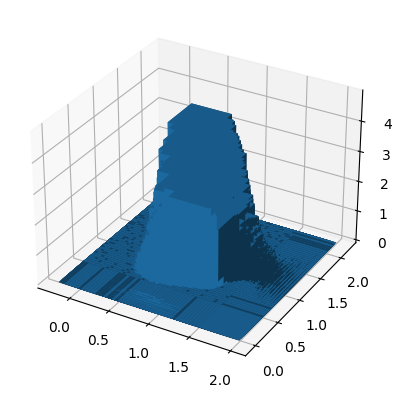

In [133]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(qx, qy, bins=50, range=[[-0.5, 1.3], [-0.3, 1.5]], density=True)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')